## Predicting Heart Disease with Classification Machine Learning Algorithms

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]
cleveland = pd.read_csv("input\processed.cleveland.data", header=None, names=columns, na_values="?")
hungarian = pd.read_csv("input\processed.hungarian.data", header=None, names=columns, na_values="?")
switzerland = pd.read_csv("input\processed.switzerland.data", header=None, names=columns, na_values="?")
va = pd.read_csv("input\processed.va.data", header=None, names=columns, na_values="?")

# Gộp các bộ dữ liệu thành một khung dữ liệu duy nhất
data = pd.concat([cleveland, hungarian, switzerland, va], ignore_index=True)
data_clean = data.dropna()
data.head()

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\vuduy\AppData\Local\Temp\ipykernel_8012\3768291285.py:5: SyntaxWarning: invalid escape sequence '\p'
  cleveland = pd.read_csv("input\processed.cleveland.data", header=None, names=columns, na_values="?")
C:\Users\vuduy\AppData\Local\Temp\ipykernel_8012\3768291285.py:6: SyntaxWarning: invalid escape sequence '\p'
  hungarian = pd.read_csv("input\processed.hungarian.data", header=None, names=columns, na_values="?")
C:\Users\vuduy\AppData\Local\Temp\ipykernel_8012\3768291285.py:7: SyntaxWarning: invalid escape sequence '\p'
  switzerland = pd.read_csv("input\processed.switzerland.data", 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [17]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Our data has 3 types of data:
1. Continuous (#): which is quantitative data that can be measured- age, trestbps, chol, thalach, oldpeak
2. Ordinal Data: Categorical data that has a order to it (0,1,2,3, etc)- cp, restecg,  slope, ca, thal
3. Binary Data: data whose unit can take on only two possible states ( 0 &1 )- sex, fbs, exang

In [18]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

## Numerical Features

### Distribution

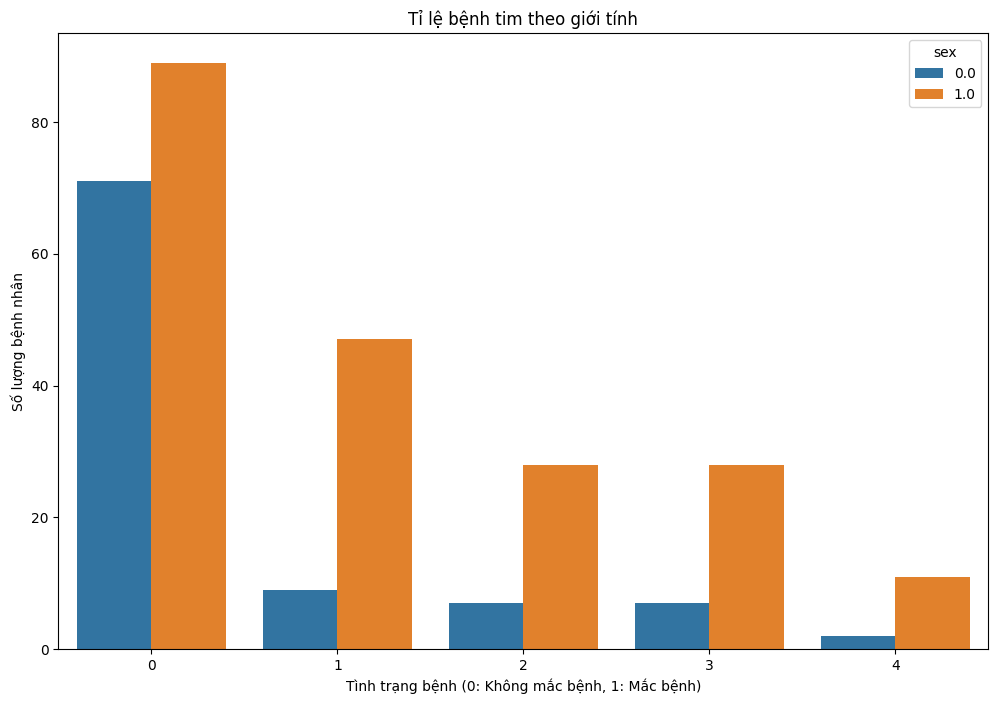

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data_clean, x='target', hue='sex')
plt.title("Tỉ lệ bệnh tim theo giới tính")
plt.xlabel("Tình trạng bệnh (0: Không mắc bệnh, 1: Mắc bệnh)")
plt.ylabel("Số lượng bệnh nhân")
plt.show()

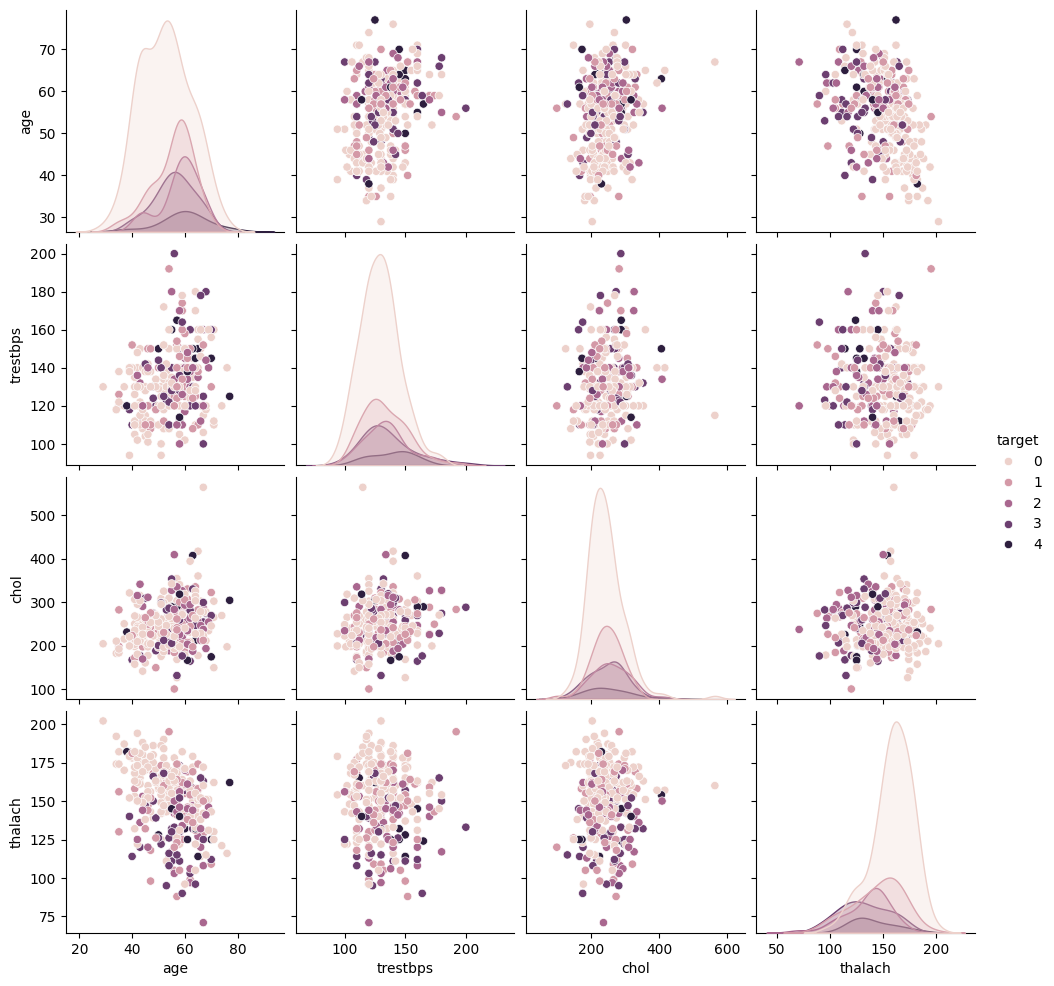

In [20]:
sns.pairplot(data_clean, hue="target", vars=["age", "trestbps", "chol", "thalach"])
plt.show()
